## <u>Problem Statement</u>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

### <u>Step 1: Reading and Understanding the Data</u>

In [379]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [380]:
import numpy as np
import pandas as pd

In [381]:
#importing dataset
df = pd.read_csv("day.csv")

In [382]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [383]:
#dataset shape
df.shape

(730, 16)

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<font color = red ><b><u>*Checking for Null Values in all columns*</font></b>

In [385]:
#checking number of null values in each column
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<font color = blue>*No null values are present in columns*</font>

<font color = red ><b><u>*Removing columns which are not required for analysis*</font></b>

In [386]:
#removing instant and dteday column
df = df.drop(['instant','dteday'],axis=1)

In [387]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<font color = blue>*Removed columns "dteday" and "instant" from the dataframe because instant column holds record index values which are not required for analysis and "dteday" holds the date information which is already provided by other columns*</font>

### <u>Step 2: Data Visualization</u>

Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns

<font color = red><b><u>*Visualising Numeric Variables*</u></b></font>

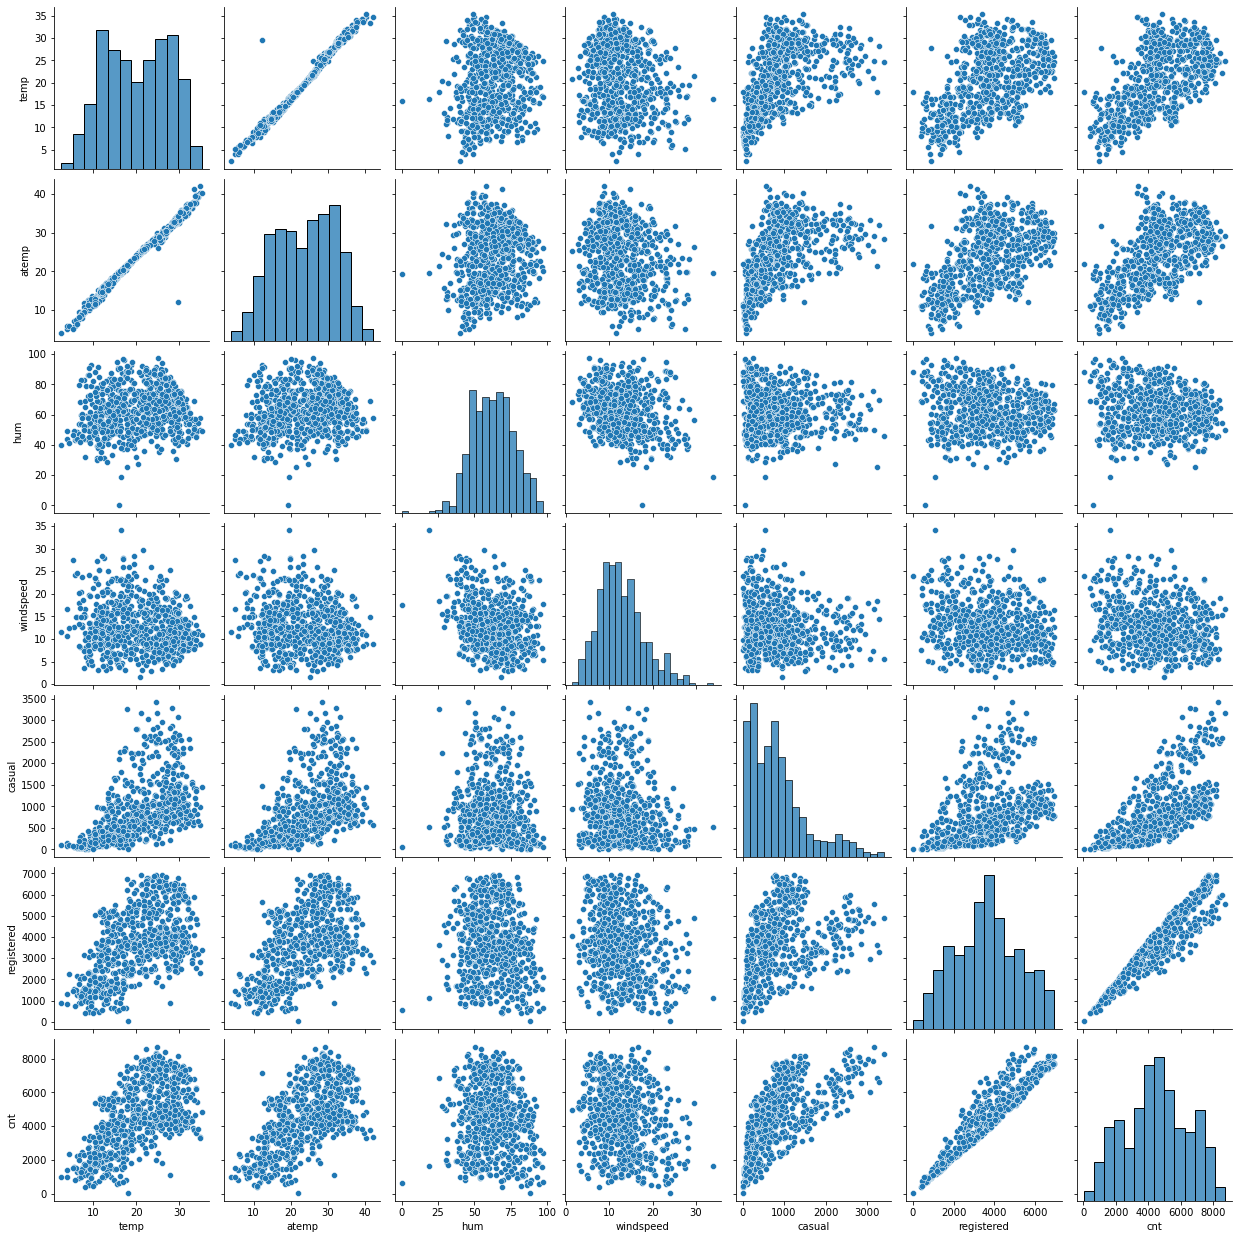

In [389]:
sns.pairplot(data = df, vars = ['temp','atemp','hum','windspeed','casual','registered','cnt'])
plt.show()

<font color = blue>*As we can see there are two cases of multicollinearity :*</font>

- <font color = blue>*There is a linear relation between temp and atemp. We need to remove one of them after considering p value but we cant remove them now since it is required for analysis*</font>
- <font color = blue>*cnt is a sum of casual and registered column, we can remove these both because cnt is our target variabe and we dont require these two colums for analysis*</font>
    
   
   

In [390]:
df = df.drop(['casual','registered'],axis=1)

In [391]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


<font color = red><b><u>*Visualising Categorical Variables*</u></b></font>

*Categorical variables here are encoded in numbers, for better visualisation and understanding, we will convert it to understandable data*

In [392]:
# season
df['season'] = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

# month
df['mnth'] = df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# weekday
df['weekday'] = df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# weathersit
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [393]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


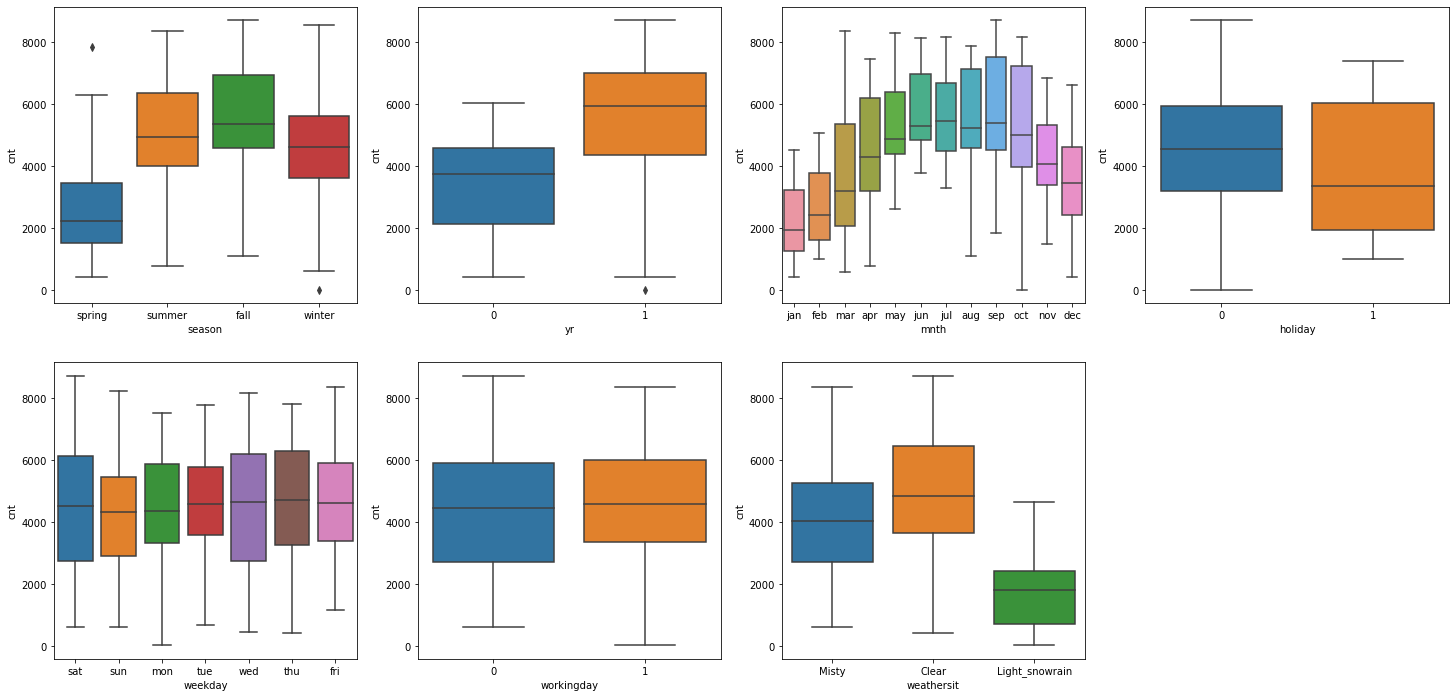

In [394]:
plt.figure(figsize=(25, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

### <u>Step 3: Data Preparation</u>

<font color = red><b><u>*Introducing Dummy Variables*</u></b></font>

In [395]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'Season'
Season = pd.get_dummies(df['season'])

# Checking the Season head
Season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [396]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'Month'
Month = pd.get_dummies(df['mnth'])

# Checking the Season head
Month.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [397]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'Weekday'
Weekday = pd.get_dummies(df['weekday'])

# Checking the Season head
Weekday.head()

,fri,mon,sat,sun,thu,tue,wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [398]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'Weathersit'
Weathersit = pd.get_dummies(df['weathersit'])

# Checking the Season head
Weathersit.head()

,Clear,Light_snowrain,Misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


<font color = blue>*We don't need all the levels in dummy variables, we can drop the first column as the sufficient information can be relayed by (n-1) levels*</font>

In [399]:
# Let's drop the first column from Season using 'drop_first = True'
Season = pd.get_dummies(df['season'], drop_first = True)

# Add the results to the original housing dataframe
df = pd.concat([df, Season], axis = 1)

# Checking the Season head
Season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [400]:
# Let's drop the first column from Month using 'drop_first = True'
Month = pd.get_dummies(df['mnth'], drop_first = True)

# Add the results to the original housing dataframe
df = pd.concat([df, Month], axis = 1)

# Checking the Season head
Month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [401]:
# Let's drop the first column from Weekday using 'drop_first = True'
Weekday = pd.get_dummies(df['weekday'], drop_first = True)

# Add the results to the original housing dataframe
df = pd.concat([df, Weekday], axis = 1)

# Checking the Season head
Weekday.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [402]:
# Let's drop the first column from Weathersit using 'drop_first = True'
Weathersit = pd.get_dummies(df['weathersit'], drop_first = True)

# Add the results to the original housing dataframe
df = pd.concat([df, Weathersit], axis = 1)

# Checking the Season head
Weathersit.head()

,Light_snowrain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


<font color = blue>*Removing the variables which are used to create dummy variables as they are no longer needeed*</font>

In [403]:
# Removing the columns used to create dummy variables as it is no longer needed.

df.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [404]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  jul             730 non-null    uint8  
 16  jun             730 non-null    uint8  
 17  mar             730 non-null    uin

In [406]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <u>Step 4: Splitting the Data into Training and Testing Sets</u>

<font color = red><u><b>*Splitting the Dataset*</u></font>

<font color = blue>*Before building the model we need to split the dataset into training and test sets*</font>

In [407]:
from sklearn.model_selection import train_test_split

In [408]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state=100)

In [409]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


<font color = red><u><b>*Scaling the Variables*</u></b></font>

<font color = blue>*It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become an issue at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.*

<font color = blue>*Thumb rule is to use <u><b>Min-Max scaling</u></b> as it takes care of outlier because maximum value is 1.*


In [410]:
from sklearn.preprocessing import MinMaxScaler

In [411]:
#create an object
scaler = MinMaxScaler()

In [412]:
# fit on data
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [413]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [414]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<font color = red><u><b>*Checking the correrlation between variables*</u></b></font>

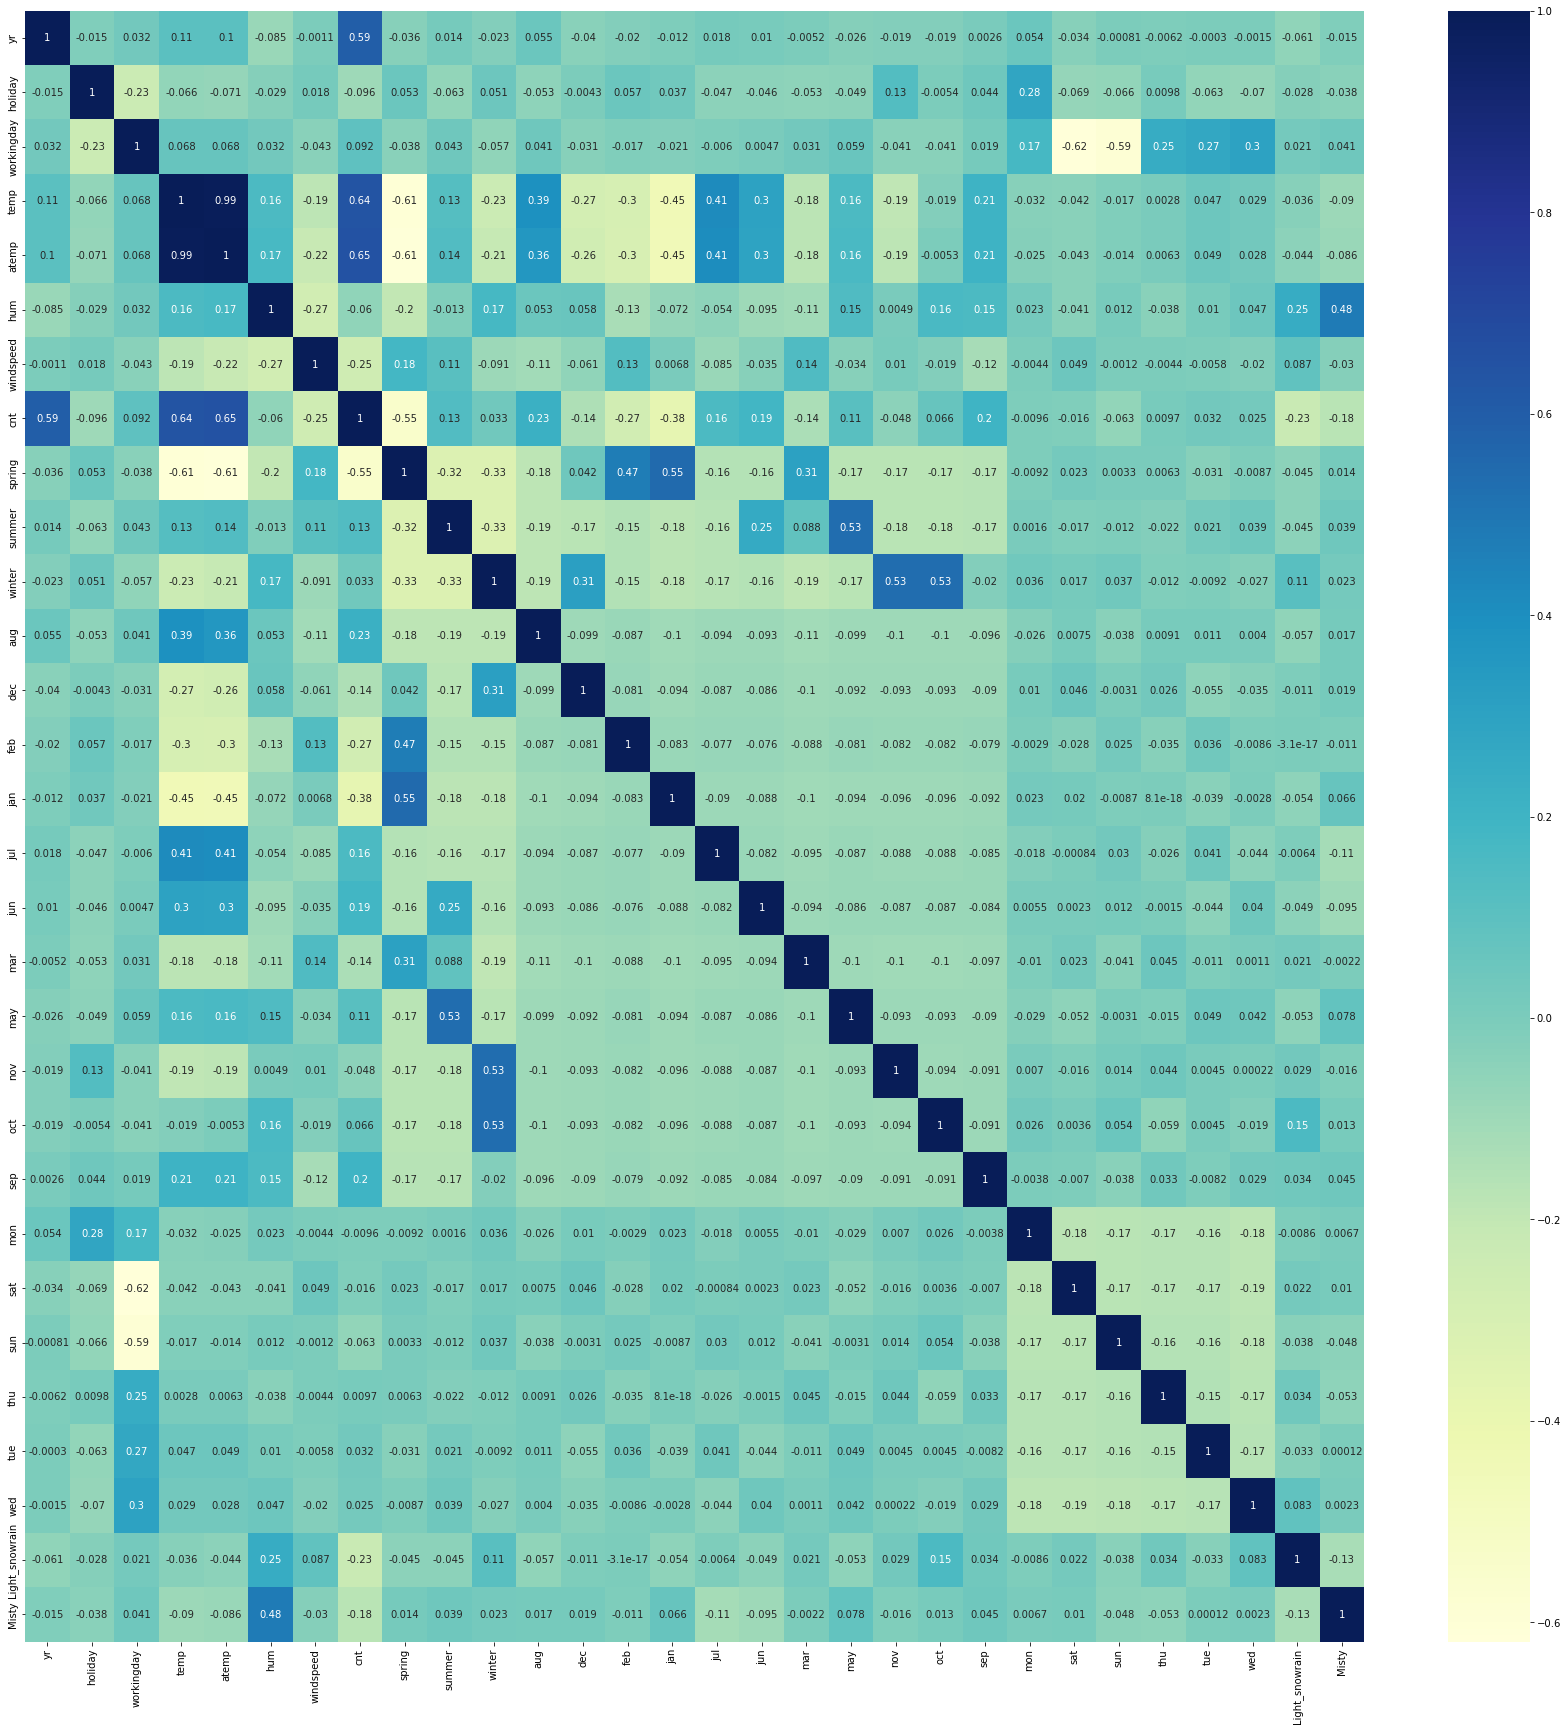

In [415]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

<font color = blue><u><b>*atemp*</b> *and* <b>*temp*</b> *are highly correlated with cnt*</u></font>

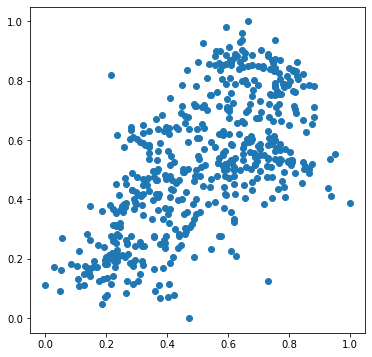

In [416]:
#pairplot for atemp vs cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

<font color = red><u><b>*Dividing into X and y sets for the model building*</u></b></font>

In [417]:
y_train = df_train.pop('cnt')
X_train = df_train

### <u>Step 5: Building a linear model</u>

<font color = red><u><b>*Using Recursive Feature Elimination Technique*</u></b></font>

<font color = blue>*Before fitting the regression line , We will use RFE to get the best n features*</font>

In [418]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [419]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [420]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 13),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 5),
 ('mar', False, 9),
 ('may', False, 15),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 14),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 12),
 ('tue', False, 8),
 ('wed', False, 10),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [421]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sep', 'sat', 'Light_snowrain',
       'Misty'],
      dtype='object')

In [422]:
# columns rejected 
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

<font color = red><u><b>*Building the model*</u></b></font>


<font color = blue>*Building model using statsmodel, for the detailed statistics*</font>


In [423]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

<font color = blue>*While fitting a regression line in statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if this step is not performed, statsmodels fits a regression line passing through the origin by default.*</font>

<font color = blue><u><b>*Iteration 1*</u></b></font>

In [424]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [425]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [426]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 15 May 2023   Prob (F-statistic):          2.31e-191
Time:                        05:19:03   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2510      0.036      6.

<font color = blue><u><b>*Iteration 2*</u></b></font>

<font color = blue>*Variable '\'jan'\' can be dropped due to high p value, so it is insignificant as compared to others*</font>

In [427]:
X_train_rfe = X_train_rfe.drop(["jan"], axis = 1)

<font color = blue>*Rebuilding the model without "jan"*</font>

In [428]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [429]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [430]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 15 May 2023   Prob (F-statistic):          1.13e-191
Time:                        05:19:09   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2394      0.036      6.

In [431]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

<font color = blue>*Calculating VIF*</font>

In [432]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.44
7,summer,2.83
13,Misty,2.28
0,yr,2.08
11,sat,1.97


<font color = blue>*VIF value of variable "hum" is very high, we can drop this variable*</font>

<font color = blue><u><b>*Iteration 3*</u></b></font>

In [433]:
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

<font color = blue>*Rebuilding the model without "hum"*</font>

In [434]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [435]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [436]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 15 May 2023   Prob (F-statistic):          5.73e-189
Time:                        05:19:14   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1577      0.031      5.

<font color = blue>*Recalculating VIF*</font>

In [437]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,spring,2.49
6,summer,2.32
0,yr,2.07
7,winter,1.99
10,sat,1.96
8,jul,1.58
12,Misty,1.56


<font color = blue>*Variable '\'holiday'\' can be dropped due to high p value, so it is insignificant as compared to others*</font>

<font color = blue><u><b>*Iteration 4*</u></b></font>

In [438]:
X_train_rfe = X_train_rfe.drop(['holiday'],axis=1)

<font color = blue>*Rebuilding the model without "holiday"*</font>

In [439]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [440]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [441]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 15 May 2023   Prob (F-statistic):          3.28e-189
Time:                        05:19:26   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1493      0.031      4.

<font color = blue>*Recalculating VIF*</font>

In [442]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,yr,2.07
6,winter,1.92
9,sat,1.83
7,jul,1.58
11,Misty,1.56


<font color = blue>*Variable '\'jul'\' can be dropped due to slightly high p value, so it is insignificant as compared to others*</font>

<font color = blue><u><b>*Iteration 5*</u></b></font>

In [443]:
X_train_rfe = X_train_rfe.drop(['jul'],axis=1)

<font color = blue>*Rebuilding the model without "jul"*</font>

In [444]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [445]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [446]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 15 May 2023   Prob (F-statistic):          6.86e-189
Time:                        05:19:42   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1405      0.031      4.

<font color = blue>*Recalculating VIF*</font>

In [447]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,yr,2.07
5,summer,1.99
8,sat,1.83
6,winter,1.77
10,Misty,1.56
7,sep,1.23


<font color = blue>*Variable '\'spring'\' can be dropped due to high p value, so it is insignificant as compared to others*</font>

<font color = blue><u><b>*Iteration 6*</u></b></font>

In [448]:
X_train_rfe = X_train_rfe.drop(['spring'],axis=1)

<font color = blue>*Rebuilding the model without "spring"*</font>

In [449]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [450]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [451]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 15 May 2023   Prob (F-statistic):          1.47e-188
Time:                        05:19:54   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0753      0.019      4.

<font color = blue>*Recalculating VIF*</font>

In [452]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,sat,1.69
4,summer,1.57
9,Misty,1.53
5,winter,1.40
6,sep,1.20
8,Light_snowrain,1.08


<font color = blue>*As we can observe :*
    
<font color = blue>- *All the VIF values are under 5*
    
<font color = blue>- *F-Statistics is 254 i.e greater than 1 and prob(F-Statistics) is very low which indicates model is significant.*
    
<font color = blue>- *R-squared value is 0.836 and adjusted R squared value is 0.832 which is a good number.*
    

### <u>Step 6: Residual Analysis of the train data</u>

<font color = blue>*Now we need to check whether the error terms are normally distributed or not*

In [453]:
y_train_cnt = lm.predict(X_train_lm)

In [454]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

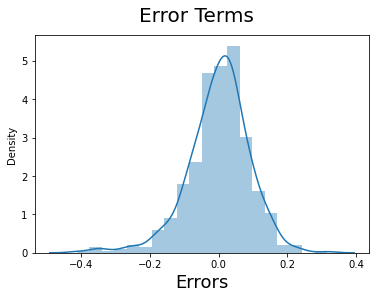

In [455]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<font color = blue>*Here we can easily observe that the error terms are normally distributed*

### <u>Step 7: Making Predictions</u>

<font color = blue>*Now we have the trained model with us, we need to make predictions using the model and we can do that by testing it with the test sets we created in the beginning*

<font color = red><u><b>*Applying Scaling on the test sets*

In [456]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

<font color = red><u><b>*Dividing into X_test and y_test*

In [457]:
y_test = df_test.pop('cnt')
X_test = df_test
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_rfe.columns]

In [458]:
# Adding a constant variable 
X_test = sm.add_constant(X_test)
# Making predictions
y_pred = lm.predict(X_test)

In [459]:
# calculating R-square score on test set

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7956

<font color = blue>*R squared value for test data set is 0.7956 and 0.836 for trained data set*

### <u>Step 8: Model Evaluation</u>

<font color = blue>*Understanding the spread between actual and predicted values*

Text(0, 0.5, 'y_pred')

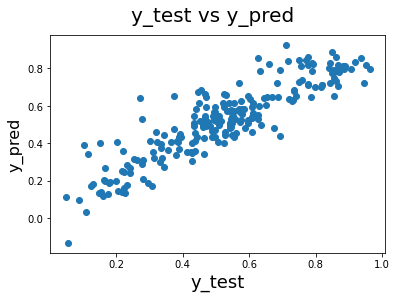

In [460]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

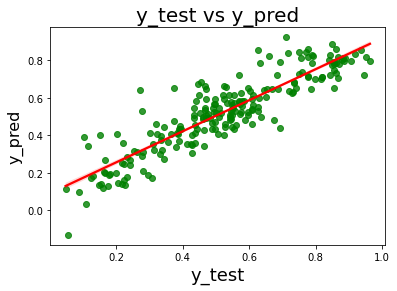

In [461]:
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [462]:
# Coefficients of the model

round(lm.params,4)

const             0.0753
yr                0.2331
workingday        0.0563
temp              0.5499
windspeed        -0.1552
summer            0.0874
winter            0.1318
sep               0.0972
sat               0.0677
Light_snowrain   -0.2880
Misty            -0.0813
dtype: float64

<font color = blue><u>*Equation of the best fitted line is :*
    
<font color = blue>$$cnt = 0.0753 + 0.2331  \times  year + 0.0563  \times  workingday + 0.5499 \times temp - 0.1552 \times windspeed + 0.0874 \times summer + 0.1318 \times winter + 0.0972 \times sep + 0.0677 \times sat - 0.2880 \times Light  snowrain - 0.0813 \times Misty$$

### <u>Conclusion</u>

<font color = blue>*1. Significant Variables that are important in predicting the demand for Shared Bikes are :*

- <font color = blue>yr
- <font color = blue>workingday 
- <font color = blue>temp
- <font color = blue>windspeed
- <font color = blue>summer
- <font color = blue>winter
- <font color = blue>sep
- <font color = blue>sat
- <font color = blue>Light_snowrain
- <font color = blue>Misty
    
<font color = blue>*2.There is 79.56% of the variance in the dependent variable that is explained by the independent variables listed above*   
